Examples of using the `pygravlens` code for gravitational lensing.

By Chuck Keeton

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pygravlens as gl

# Singular Isothermal Sphere (SIS) lens

Create an SIS lens at the origin with an Einstein radius of 1. Set up the model, compute the tiling, and plot. Here we use the default grid.

number of planes: 1
maingrid: [[-2.5, 2.5, 20], [-2.5, 2.5, 20]]
galgrid: [1e-06, 2.5, 20, 20]


/Users/chuckkeeton/projects/pygravlens/pygravlens.py:1237: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


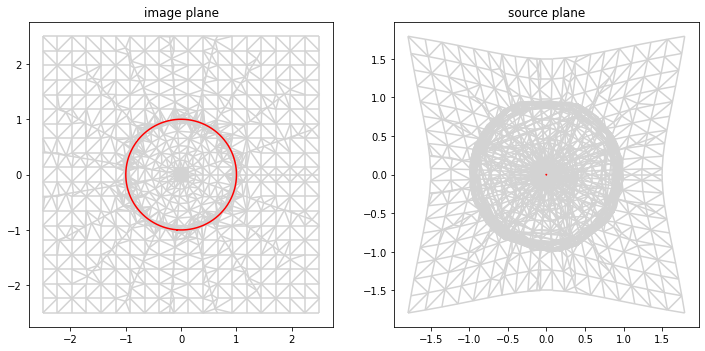

In [2]:
plane = gl.lensplane('SIS',[0.0,0.0,1.0])
model = gl.lensmodel([plane])
model.info()
model.tile()
model.plot(plotgrid=True,plotcrit='red')

Change the gridding.

/Users/chuckkeeton/projects/pygravlens/pygravlens.py:1237: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


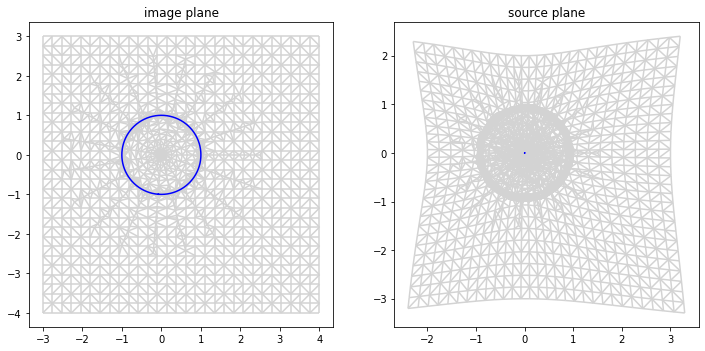

In [3]:
model.maingrid(-3.0,4.0,30,-4.0,3.0,30)
model.tile()
model.plot(plotgrid=True,plotcrit='blue')

Solve the lens equation for a sample source.

In [4]:
imgarr,muarr = model.findimg([0.6,0.0])
print('positions')
print(imgarr)
print('magnifications')
print(muarr)

positions
[[ 1.59999938e+00 -1.79216811e-08]
 [-1.87501250e-06  1.11604620e-14]
 [-3.99997488e-01 -1.31688348e-10]]
magnifications
[ 2.66666666e+00  2.07524100e-11 -6.66666633e-01]


In [5]:
srcarr = [[0.6,0.2],[-0.3,0.3],[-0.2,-0.5]]
imgarr,muarr = model.findimg(srcarr)
for i in range(len(srcarr)):
    print('source',srcarr[i])
    print('images',imgarr[i])
    print('magnifications',muarr[i])
    print('')

source [0.6, 0.2]
images [[ 1.54868272e+00  5.16227554e-01]
 [-3.48680721e-01 -1.16226905e-01]
 [-2.00001550e-06 -6.66671846e-07]]
magnifications [ 2.58113883e+00 -5.81138841e-01  2.59266077e-11]

source [-0.3, 0.3]
images [[-1.00710628e+00  1.00710628e+00]
 [ 4.07105553e-01 -4.07105544e-01]
 [ 7.31709878e-07 -7.31709889e-07]]
magnifications [ 3.35702264e+00 -1.35702257e+00  8.56061059e-12]

source [-0.2, -0.5]
images [[ 1.71389873e-01  4.28474683e-01]
 [-5.71390441e-01 -1.42847609e+00]
 [ 5.63383168e-07  1.40845790e-06]]
magnifications [-8.56953397e-01  2.85695335e+00  1.44172239e-11]



We can include a source when plotting. Here the source and images are plotted in red.

/Users/chuckkeeton/projects/pygravlens/pygravlens.py:1237: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


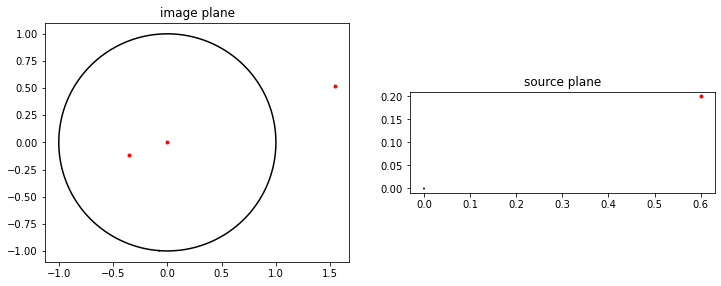

In [6]:
model.plot(src=[0.6,0.2])

We can even include multiple sources. Here each source/image set is a different color.

/Users/chuckkeeton/projects/pygravlens/pygravlens.py:1237: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


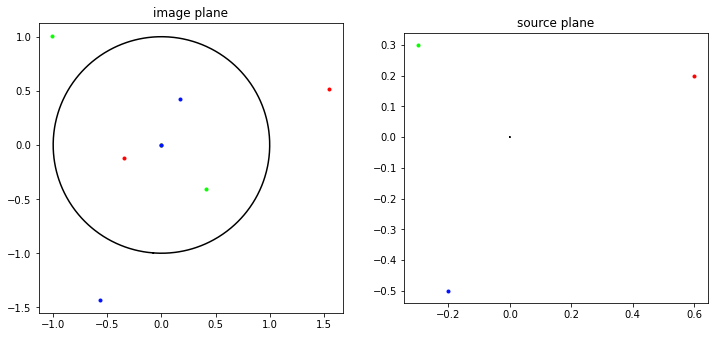

In [7]:
model.plot(src=[[0.6,0.2],[-0.3,0.3],[-0.2,-0.5]])

Compute image of an extended source - here placed at the origin

/Users/chuckkeeton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


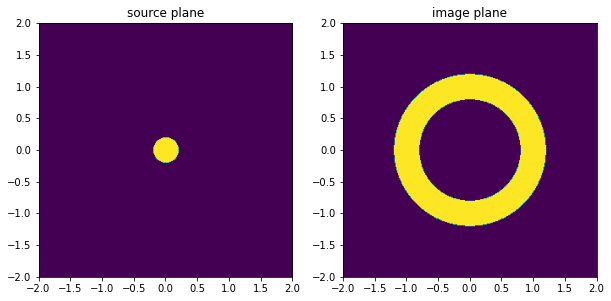

In [8]:
lo = -2
hi = 2
npix = 300
srcmap,imgmap = model.extendedimg(srcmode='disk',srcarr=[0,0,0.2,1.0],extent=[[lo,hi,npix],[lo,hi,npix]])

f,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(srcmap,origin='lower',extent=[lo,hi,lo,hi])
ax[0].set_title('source plane')
ax[1].imshow(imgmap,origin='lower',extent=[lo,hi,lo,hi])
ax[1].set_title('image plane')
f.show()

Now an array of sources

/Users/chuckkeeton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


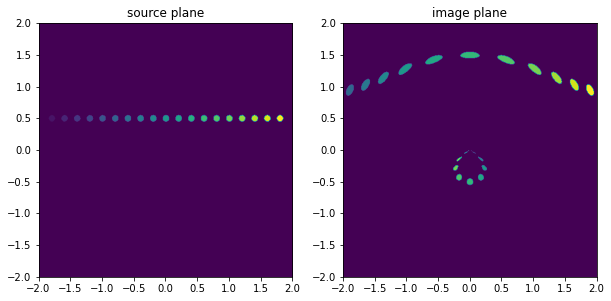

In [9]:
lo = -2
hi = 2
npix = 500

srcarr = [ [-1.8+0.2*i, 0.5, 0.05, i+1.0] for i in range(19) ]

srcmap,imgmap = model.extendedimg(srcmode='disk',srcarr=srcarr,extent=[[lo,hi,npix],[lo,hi,npix]])

f,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(srcmap,origin='lower',extent=[lo,hi,lo,hi])
ax[0].set_title('source plane')
ax[1].imshow(imgmap,origin='lower',extent=[lo,hi,lo,hi])
ax[1].set_title('image plane')
f.show()

# SIS with external shear

Take the same SIS as before and add external shear to break the symmetry. Shear can be specified as a combination of `gammac` (stretching aligned with the axes) or `gammas` (stretching along the 45-deg diagonals).

number of planes: 1
maingrid: [[-2.5, 2.5, 20], [-2.5, 2.5, 20]]
galgrid: [1e-06, 2.5, 20, 20]


/Users/chuckkeeton/projects/pygravlens/pygravlens.py:1237: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


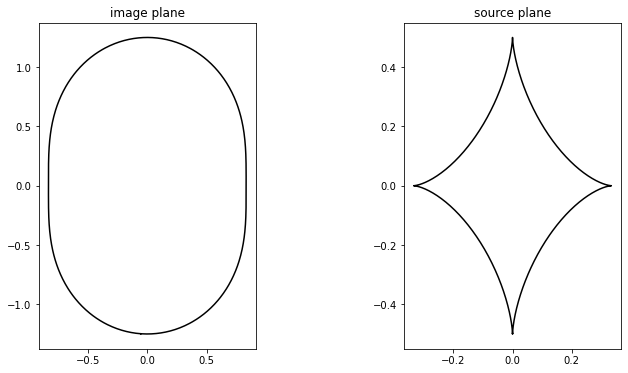

In [10]:
plane = gl.lensplane('SIS',[0.0,0.0,1.0],gammac=0.2)
model = gl.lensmodel([plane])
model.info()
model.tile()
model.plot()

Solve the lens equation for a sample source.

In [11]:
imgarr,muarr = model.findimg([0.1,0.1])
print('positions')
print(imgarr)
print('magnifications')
print(muarr)

positions
[[ 1.36020004e+00  2.11184947e-01]
 [-1.85820117e-01 -7.23825384e-01]
 [-3.53621248e-01  8.53158221e-01]
 [-1.07075848e+00  3.26149092e-01]
 [-2.04081973e-07 -2.04082160e-07]]
magnifications
[ 2.68835583e+00 -1.63214767e+00 -3.62520271e+00  4.65232794e+00
  4.33494796e-12]


We can include a source when plotting. Here the source and images are plotted in red.

/Users/chuckkeeton/projects/pygravlens/pygravlens.py:1237: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


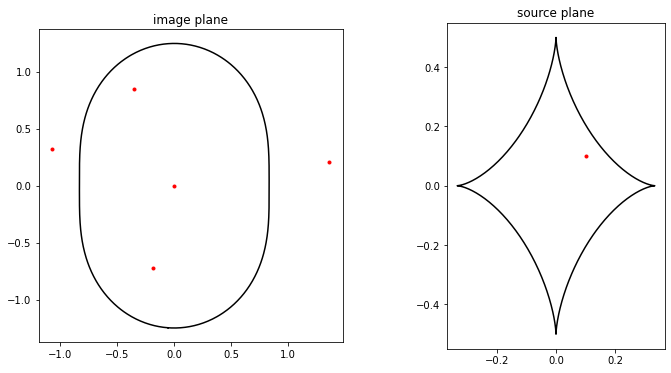

In [12]:
model.plot(src=[0.1,0.1])

We can even include multiple sources. Here each source/image set is a different color.

/Users/chuckkeeton/projects/pygravlens/pygravlens.py:1237: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


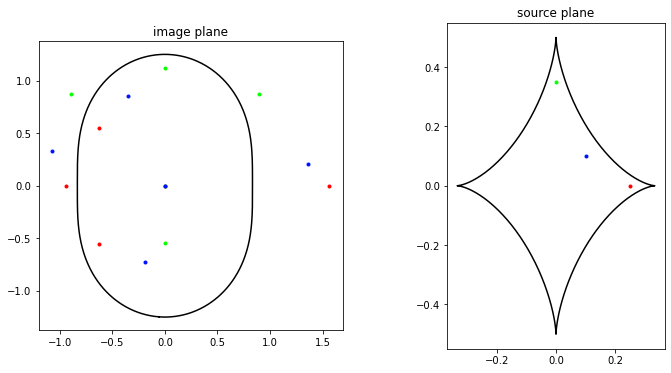

In [13]:
model.plot(src=[[0.25,0.0],[0.0,0.35],[0.1,0.1]])

Let's see what happens when the source gets bigger; we can do that by creating a set of concentric sources with different sizes

/Users/chuckkeeton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


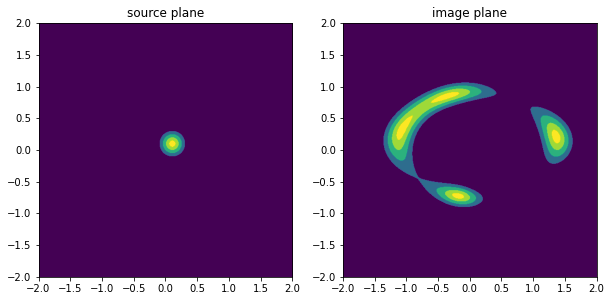

In [14]:
lo = -2
hi = 2
npix = 500

srcarr = [ [0.1, 0.1, 0.05*i, i+1] for i in range(5) ]

srcmap,imgmap = model.extendedimg(srcmode='disk',srcarr=srcarr,extent=[[lo,hi,npix],[lo,hi,npix]])

f,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(srcmap,origin='lower',extent=[lo,hi,lo,hi])
ax[0].set_title('source plane')
ax[1].imshow(imgmap,origin='lower',extent=[lo,hi,lo,hi])
ax[1].set_title('image plane')
f.show()

# Elliptical power law model

Analysis by Tessore & Metcalf:
- https://ui.adsabs.harvard.edu/abs/2015A%26A...580A..79T/abstract
- https://ui.adsabs.harvard.edu/abs/2016A%26A...593C...2T/abstract (erratum)

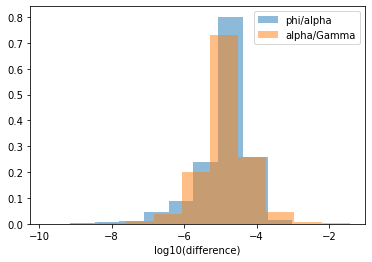

/Users/chuckkeeton/projects/pygravlens/pygravlens.py:1173: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


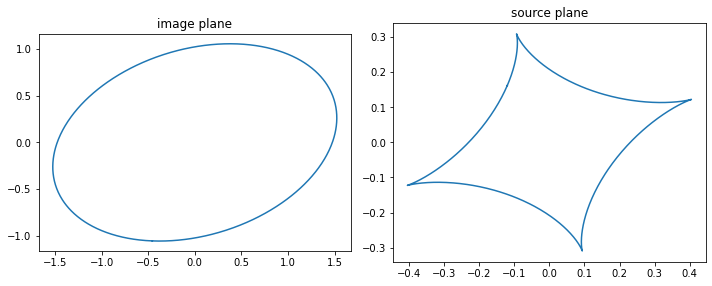

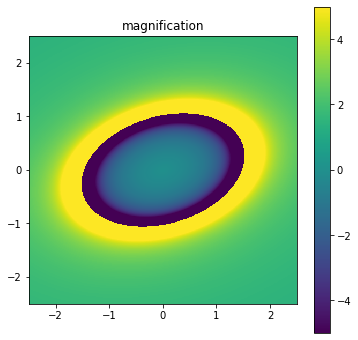

In [15]:
plane = gl.lensplane('ellpow',[0.0,0.0,1.0,1.0,0.3,0.2])
xtmp = np.random.uniform(low=-2,high=2,size=(1000,2))
plane.check(xtmp)

model = gl.lensmodel([plane])
model.plotcrit()
model.plotmag()

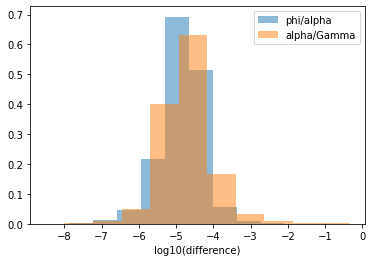

/Users/chuckkeeton/projects/pygravlens/pygravlens.py:1173: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


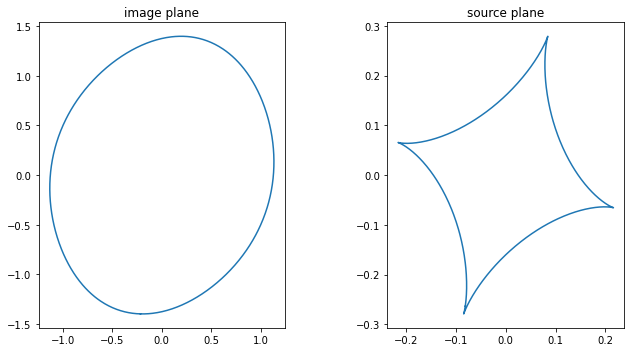

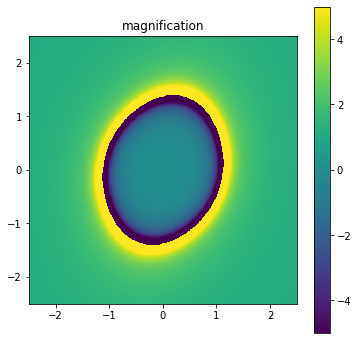

In [16]:
plane = gl.lensplane('ellpow',[0.0,0.0,0.6,1.0,-0.3,0.2])
xtmp = np.random.uniform(low=-2,high=2,size=(1000,2))
plane.check(xtmp)

model = gl.lensmodel([plane])
model.plotcrit()
model.plotmag()

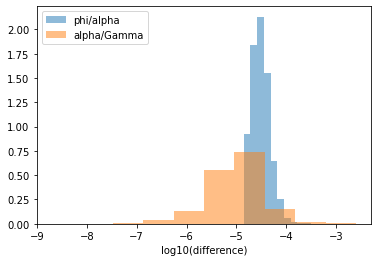

/Users/chuckkeeton/projects/pygravlens/pygravlens.py:1173: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


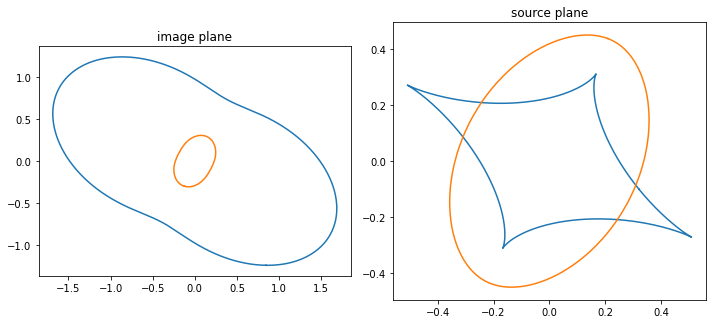

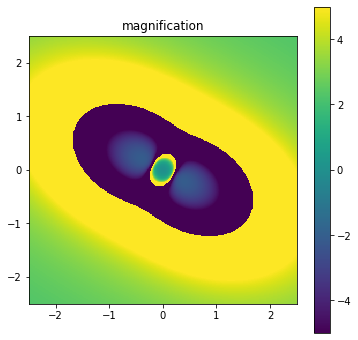

In [17]:
plane = gl.lensplane('ellpow',[0.0,0.0,1.4,1.0,0.2,-0.3])
xtmp = np.random.uniform(low=-2,high=2,size=(1000,2))
plane.check(xtmp)

model = gl.lensmodel([plane])
model.plotcrit()
model.plotmag()

# Point mass lens

number of planes: 1
maingrid: [[-2.5, 2.5, 20], [-2.5, 2.5, 20]]
galgrid: [1e-06, 2.5, 20, 20]


/Users/chuckkeeton/projects/pygravlens/pygravlens.py:1237: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


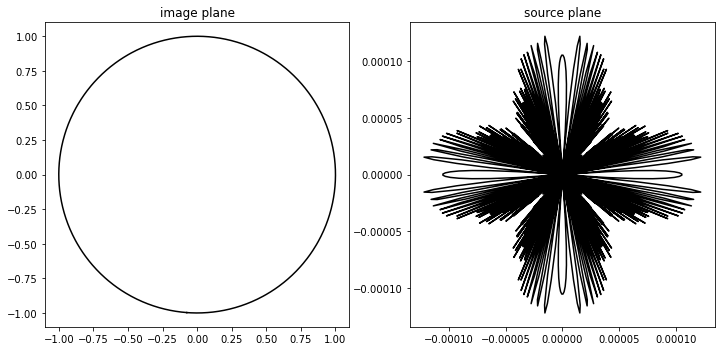

In [18]:
plane = gl.lensplane('ptmass',[0.0,0.0,1.0])
model = gl.lensmodel([plane])
model.info()
model.tile()
model.plot()

Note: the strange features in the source plane are caused by numerical noise.

In [19]:
model.findimg([0.5,0.0])

(array([[ 1.28077641e+00,  1.11298404e-08],
        [-7.80776406e-01, -4.56437267e-09]]),
 array([ 1.59141031, -0.59141031]))

# Point mass binary

/Users/chuckkeeton/projects/pygravlens/pygravlens.py:1237: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:1237: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


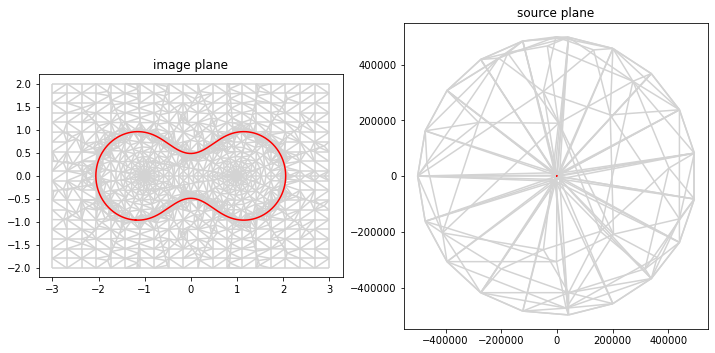

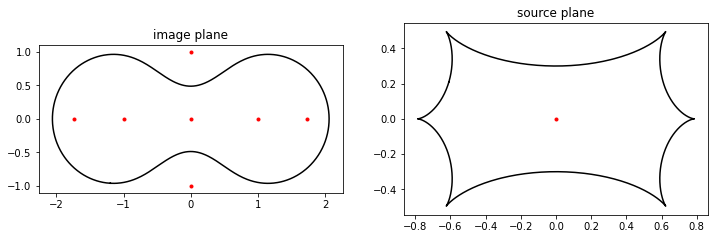

In [20]:
plane = gl.lensplane('ptmass',[[-1.0,0.0,1.0],[1.0,0.0,1.0]])
model = gl.lensmodel([plane])
model.maingrid(-3,3,20,-2,2,20)
model.galgrid(1.0e-6,2.0,20,20)
model.tile()
model.plot(plotgrid=True,plotcrit='red')
model.plot(src=[0,0])

Let's reproduce Figs. 5.2 and 5.3 in the book by Congdon & Keeton (https://link.springer.com/book/10.1007/978-3-030-02122-1).

Equal mass

/Users/chuckkeeton/projects/pygravlens/pygravlens.py:1237: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:1237: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:1237: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:1237: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:1237: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a 

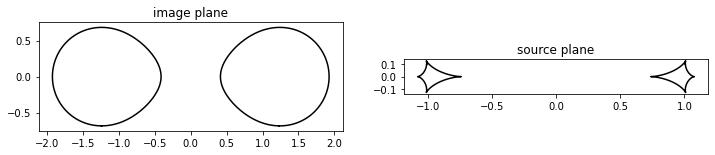

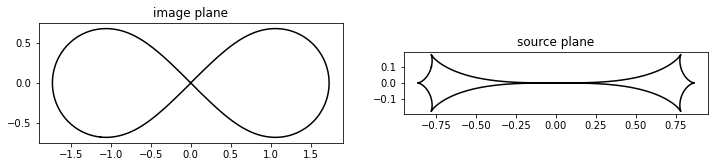

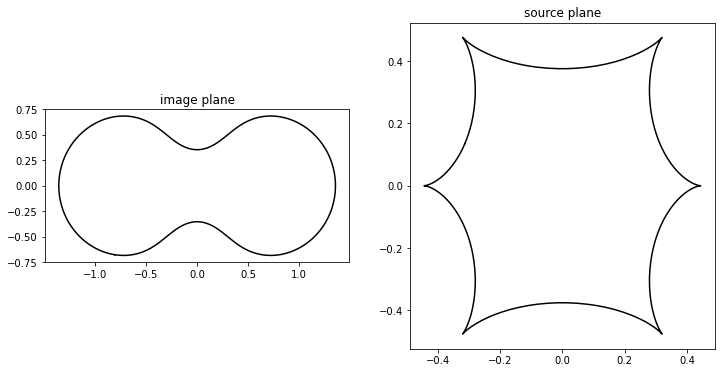

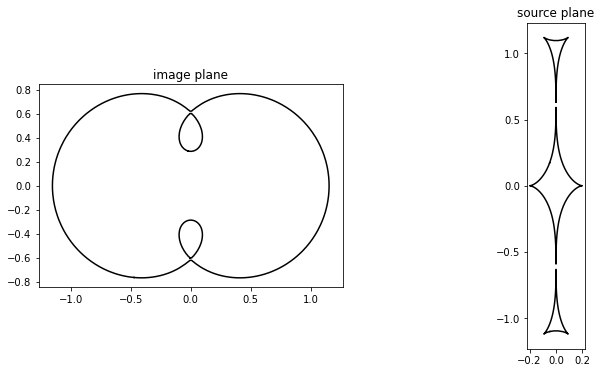

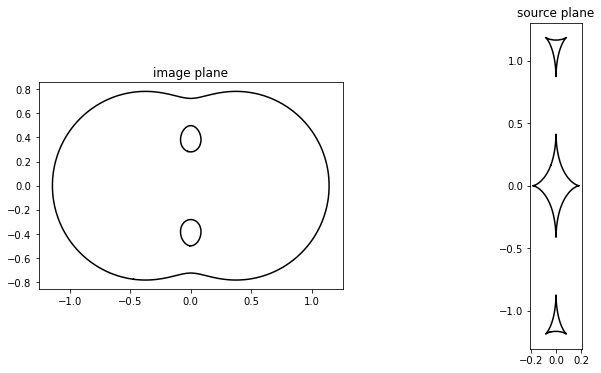

In [21]:
m1 = 0.5
m2 = 0.5

for d in (2.4, 2.0, 1.2, 0.707, 0.68):
    plane = gl.lensplane('ptmass',[[0.5*d,0.0,np.sqrt(m1)],[-0.5*d,0.0,np.sqrt(m2)]])
    model = gl.lensmodel([plane])
    model.maingrid(-4,4,40,-2,2,20)
    model.tile()
    model.plot()

Unequal mass

/Users/chuckkeeton/projects/pygravlens/pygravlens.py:1237: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:1237: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:1237: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:1237: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/Users/chuckkeeton/projects/pygravlens/pygravlens.py:1237: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a 

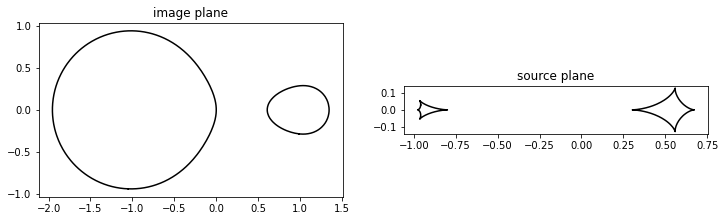

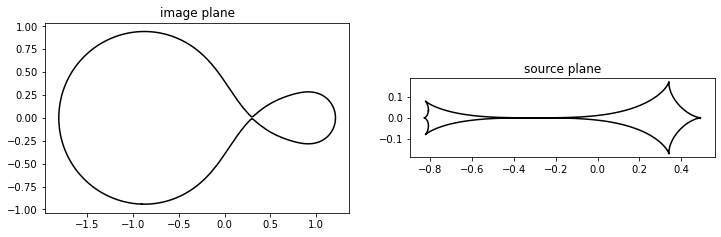

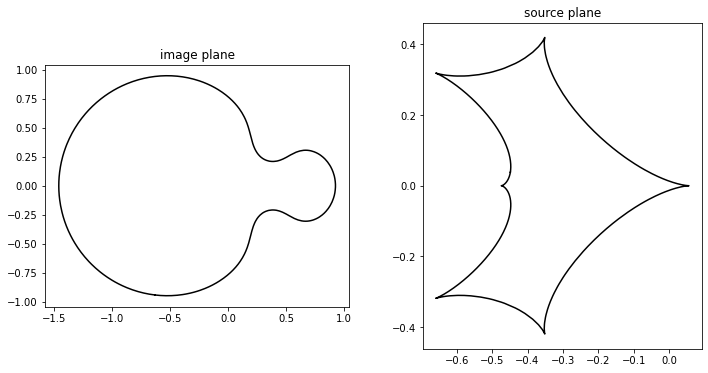

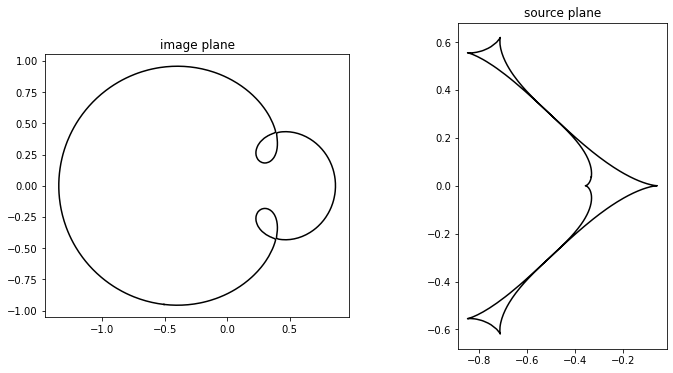

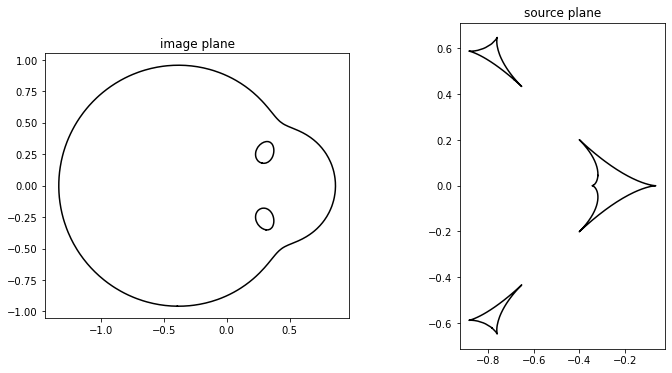

In [22]:
m1 = 0.1
m2 = 0.9

for d in (2.0, 1.709, 1.0, 0.765, 0.74):
    plane = gl.lensplane('ptmass',[[0.5*d,0.0,np.sqrt(m1)],[-0.5*d,0.0,np.sqrt(m2)]])
    model = gl.lensmodel([plane])
    model.maingrid(-4,4,40,-2,2,20)
    model.tile()
    model.plot()